# Zepto E-commerce Data Analysis

This notebook provides a comprehensive analysis of Zepto's e-commerce dataset, including data exploration, cleaning, and business insights. The analysis is structured to mirror SQL queries and provide actionable business intelligence.

## Table of Contents
1. Import Required Libraries
2. Load and Display Dataset  
3. Data Exploration and Basic Statistics
4. Data Quality Assessment
5. Category Analysis
6. Stock Status Analysis
7. Data Cleaning
8. Business Intelligence Queries

## 1. Import Required Libraries

**Note:** The `warnings.filterwarnings('ignore')` is used to suppress unnecessary warning messages from libraries like pandas and matplotlib, making the output cleaner and more focused on the analysis results.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Display Dataset

In [2]:
# Load the dataset
df = pd.read_csv('zepto_v2.csv')

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (3732, 9)
Columns: ['Category', 'name', 'mrp', 'discountPercent', 'availableQuantity', 'discountedSellingPrice', 'weightInGms', 'outOfStock', 'quantity']

First 5 rows:


,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


## 3. Data Exploration and Basic Statistics

In [3]:
# Count of rows (equivalent to SELECT COUNT(*) FROM zepto)
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

# Display data types and basic info
print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
df.describe()

Total number of rows: 3732

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB

Basic Statistics:


,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,quantity
count,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000
mean,15680.117899,7.617095,4.008574,14192.834941,387.843783,213.270900
std,16088.807618,9.211733,2.203511,13850.726265,678.096509,194.730976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,0.000000,2.000000,5500.000000,100.000000,50.000000
50%,11000.000000,6.000000,5.000000,10400.000000,225.000000,186.000000
75%,20000.000000,10.000000,6.000000,18400.000000,450.000000,340.000000
max,260000.000000,51.000000,6.000000,139900.000000,10000.000000,1500.000000


In [4]:
# Display first 10 rows (equivalent to SELECT * FROM zepto LIMIT 10)
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250
5,Fruits & Vegetables,Potato,3500,17,3,2900,1000,False,1
6,Fruits & Vegetables,Lemon,7500,16,3,6300,200,False,200
7,Fruits & Vegetables,Watermelon,5800,15,3,4900,58,False,1
8,Fruits & Vegetables,Capsicum Green,2300,17,3,1900,250,False,250
9,Fruits & Vegetables,Chilli Green,1900,15,3,1600,100,False,100


## 4. Data Quality Assessment - Null Values

In [8]:
# Check for null values (equivalent to SQL null check query)
print("Null values in each column:")
null_values = df.isnull().sum()
print(null_values)

print(f"\nTotal null values: {null_values.sum()}")

# Display rows with any null values
null_rows = df[df.isnull().any(axis=1)]
print(f"\nNumber of rows with null values: {len(null_rows)}")

if len(null_rows) > 0:
    print("\nRows with null values:")
    null_rows.head(10)
else:
    print("No null values found in the dataset!")

Null values in each column:
Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64

Total null values: 0

Number of rows with null values: 0
No null values found in the dataset!


## 5. Category Analysis

In [12]:
# Different categories (equivalent to SELECT DISTINCT category FROM zepto ORDER BY category)
categories = df['Category'].unique()
print(f"Number of different categories: {len(categories)}")
print("\nCategories (sorted):")
for category in sorted(categories):
    print(f"- {category}")

print("\nCategory distribution:")
category_counts = df['Category'].value_counts()
print(category_counts)

Number of different categories: 14

Categories (sorted):
- Beverages
- Biscuits
- Chocolates & Candies
- Cooking Essentials
- Dairy, Bread & Batter
- Fruits & Vegetables
- Health & Hygiene
- Home & Cleaning
- Ice Cream & Desserts
- Meats, Fish & Eggs
- Munchies
- Paan Corner
- Packaged Food
- Personal Care

Category distribution:
Category
Cooking Essentials       514
Munchies                 514
Packaged Food            388
Ice Cream & Desserts     388
Chocolates & Candies     388
Personal Care            344
Paan Corner              344
Home & Cleaning          194
Biscuits                 147
Dairy, Bread & Batter    129
Beverages                129
Health & Hygiene          97
Fruits & Vegetables       93
Meats, Fish & Eggs        63
Name: count, dtype: int64


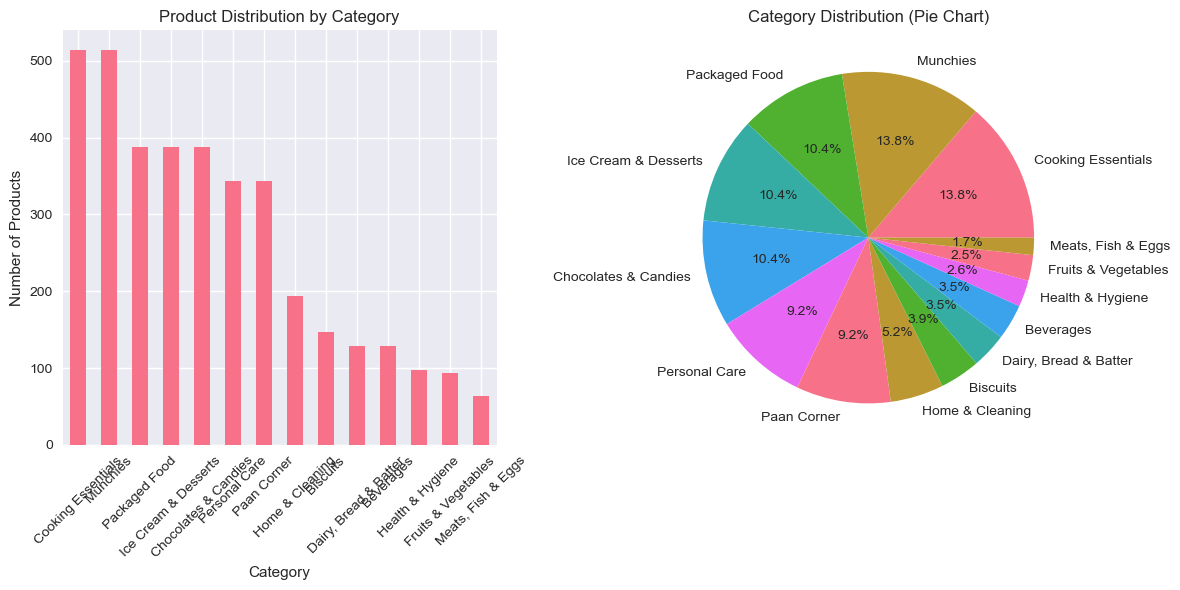

In [13]:
# Visualize category distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

## 6. Stock Status Analysis

In [14]:
# Product in Stock vs out Of Stock (equivalent to GROUP BY outOfStock)
stock_status = df.groupby('outOfStock').size().reset_index(name='count')
stock_status['status'] = stock_status['outOfStock'].map({True: 'Out of Stock', False: 'In Stock'})
print("Stock Status Distribution:")
print(stock_status[['status', 'count']])

# Product names present multiple times
duplicate_names = df.groupby('name').size().reset_index(name='Number_of_SKUs')
duplicate_names = duplicate_names[duplicate_names['Number_of_SKUs'] > 1].sort_values('Number_of_SKUs', ascending=False)
print(f"\nProducts with multiple SKUs: {len(duplicate_names)}")
print("Top 10 products with most SKUs:")
print(duplicate_names.head(10))

Stock Status Distribution:
         status  count
0      In Stock   3279
1  Out of Stock    453

Products with multiple SKUs: 1214
Top 10 products with most SKUs:
                                                 name  Number_of_SKUs
966                    Mother's Recipe Tamarind Paste              10
99                                   Arden Eggs White              10
1450  Sunfeast Yippee! Pasta Treat - Sour Cream Onion              10
1338                 Saffola Veggie Twist Masala Oats              10
70       Amul Delicious Fat Spread - Cholesterol Free              10
1301                                      Quaker Oats              10
778         Kellogg's Real Almond & Honey Corn Flakes               9
71                                   Amul Fresh Cream               8
1677                           iD Idli & Dosa Batter                7
961                    Mother's Recipe Pickle - Mango               6


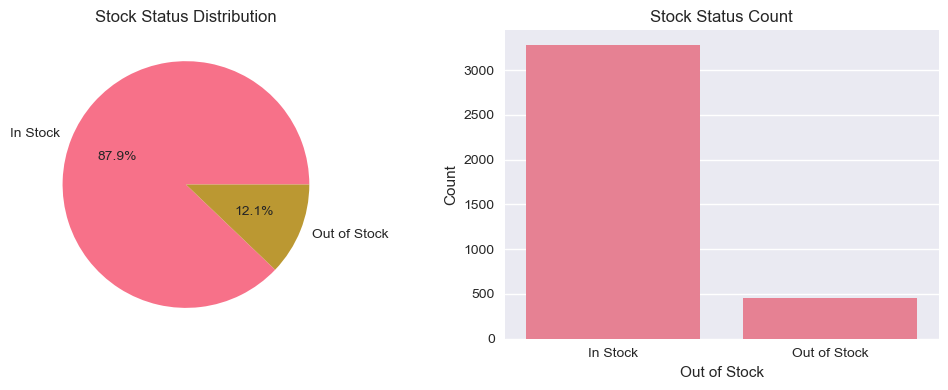

In [15]:
# Visualize stock status
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
stock_counts = df['outOfStock'].value_counts()
labels = ['In Stock', 'Out of Stock']
plt.pie(stock_counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Stock Status Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='outOfStock')
plt.title('Stock Status Count')
plt.xlabel('Out of Stock')
plt.ylabel('Count')
plt.xticks([0, 1], ['In Stock', 'Out of Stock'])

plt.tight_layout()
plt.show()

## 7. Data Cleaning

In [16]:
# Check for products with price = 0 (equivalent to SQL WHERE mrp = 0 OR discountedSellingPrice = 0)
zero_price_products = df[(df['mrp'] == 0) | (df['discountedSellingPrice'] == 0)]
print(f"Products with zero prices: {len(zero_price_products)}")

if len(zero_price_products) > 0:
    print("Products with zero prices:")
    print(zero_price_products[['name', 'mrp', 'discountedSellingPrice']].head(10))
    
    # Remove products with zero MRP (equivalent to DELETE FROM zepto WHERE mrp = 0)
    df_cleaned = df[df['mrp'] != 0].copy()
    print(f"\nDataset shape after removing zero MRP products: {df_cleaned.shape}")
else:
    print("No products with zero prices found.")
    df_cleaned = df.copy()

Products with zero prices: 1
Products with zero prices:
                                            name  mrp  discountedSellingPrice
3606  Cherry Blossom Liquid Shoe Polish Neutral     0                       0

Dataset shape after removing zero MRP products: (3731, 9)


In [17]:
# Check if prices need to be converted from paise to rupees
print("Sample prices before conversion:")
print(df_cleaned[['mrp', 'discountedSellingPrice']].head())
print(f"\nAverage MRP: {df_cleaned['mrp'].mean():.2f}")
print(f"Max MRP: {df_cleaned['mrp'].max():.2f}")

# If prices seem to be in paise (very high values), convert to rupees
if df_cleaned['mrp'].mean() > 1000:
    print("\nPrices appear to be in paise. Converting to rupees...")
    df_cleaned['mrp'] = df_cleaned['mrp'] / 100.0
    df_cleaned['discountedSellingPrice'] = df_cleaned['discountedSellingPrice'] / 100.0
    
    print("Sample prices after conversion:")
    print(df_cleaned[['mrp', 'discountedSellingPrice']].head())
else:
    print("\nPrices appear to already be in rupees.")

Sample prices before conversion:
    mrp  discountedSellingPrice
0  2500                    2100
1  4200                    3500
2  5100                    4300
3  2000                    1700
4  1400                    1200

Average MRP: 15684.32
Max MRP: 260000.00

Prices appear to be in paise. Converting to rupees...
Sample prices after conversion:
    mrp  discountedSellingPrice
0  25.0                    21.0
1  42.0                    35.0
2  51.0                    43.0
3  20.0                    17.0
4  14.0                    12.0


## 8. Business Intelligence Queries

### Q1. Find the top 10 best-value products based on discount percentage

Top 10 products with highest discount percentage:
                                       name    mrp  discountPercent
2615              Dukes Waffy Orange Wafers   45.0               51
2619          Dukes Waffy Strawberry Wafers   45.0               51
2608           Dukes Waffy Chocolate Wafers   45.0               51
198   Chef's Basket Durum Wheat Elbow Pasta  160.0               50
1197            RRO Mozzarella Pizza Cheese  275.0               50
3636          Epigamia Fruit Yogurt Vanilla   40.0               50
3635   Epigamia Fruit Yogurt Alphonso Mango   40.0               50
1200                     RRO Burrata Cheese  250.0               50
1213                  RRO Mascarpone Cheese  355.0               50
1249            RRO Mozzarella Block Cheese  295.0               50


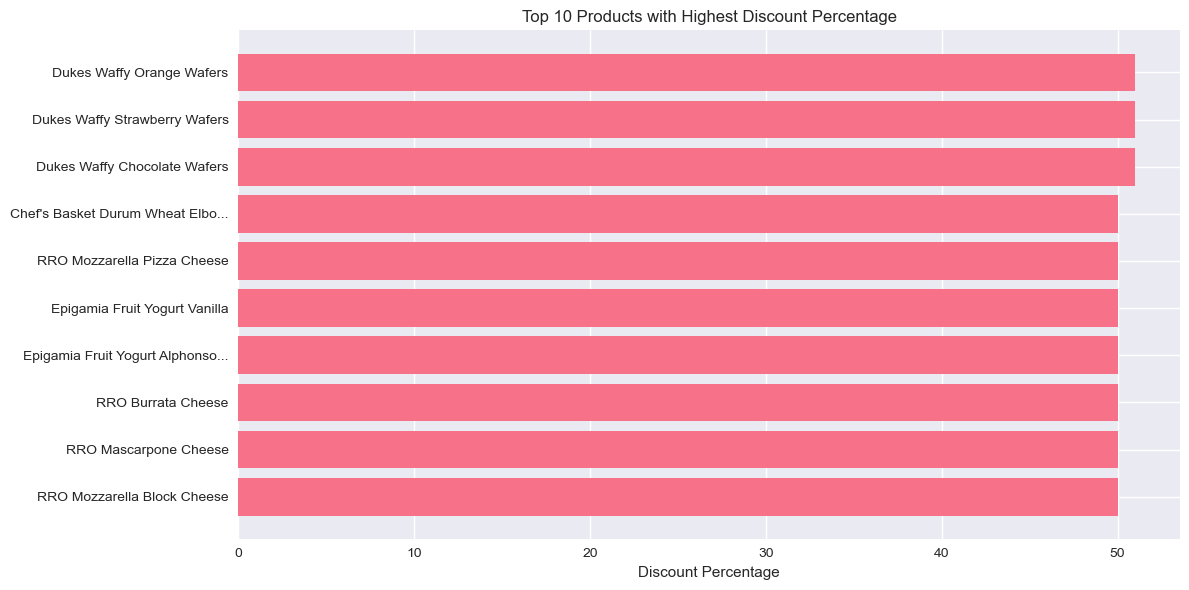

In [18]:
# Q1. Top 10 best-value products based on discount percentage
top_discounts = df_cleaned.drop_duplicates(subset=['name'])[['name', 'mrp', 'discountPercent']].sort_values('discountPercent', ascending=False).head(10)
print("Top 10 products with highest discount percentage:")
print(top_discounts)

# Visualize top discounts
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_discounts)), top_discounts['discountPercent'])
plt.yticks(range(len(top_discounts)), [name[:30] + '...' if len(name) > 30 else name for name in top_discounts['name']])
plt.xlabel('Discount Percentage')
plt.title('Top 10 Products with Highest Discount Percentage')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Q2. Products with High MRP but Out of Stock

In [19]:
# Q2. Products with High MRP but Out of Stock
high_mrp_out_of_stock = df_cleaned[(df_cleaned['outOfStock'] == True) & (df_cleaned['mrp'] > 300)].drop_duplicates(subset=['name'])[['name', 'mrp']].sort_values('mrp', ascending=False)
print(f"Products with high MRP (>300) that are out of stock: {len(high_mrp_out_of_stock)}")
print("\nTop 10 high-value out-of-stock products:")
print(high_mrp_out_of_stock.head(10))

# Calculate potential lost revenue
if len(high_mrp_out_of_stock) > 0:
    total_lost_revenue = high_mrp_out_of_stock['mrp'].sum()
    print(f"\nPotential lost revenue from high-MRP out-of-stock products: ₹{total_lost_revenue:,.2f}")
else:
    print("No high-MRP products are currently out of stock.")

Products with high MRP (>300) that are out of stock: 4

Top 10 high-value out-of-stock products:
                                                   name    mrp
580                                Patanjali Cow's Ghee  565.0
3096  MamyPoko Pants Standard Diapers, Extra Large (...  399.0
553                     Aashirvaad Atta With Mutigrains  315.0
573                  Everest Kashmiri Lal Chilli Powder  310.0

Potential lost revenue from high-MRP out-of-stock products: ₹1,589.00


### Q3. Calculate Estimated Revenue for each category

Estimated Revenue by Category:
                 Category  total_revenue
5     Fruits & Vegetables        10846.0
9      Meats, Fish & Eggs        20693.0
1                Biscuits        25007.6
0               Beverages        55051.0
4   Dairy, Bread & Batter        55051.0
6        Health & Hygiene        64180.0
7         Home & Cleaning       122661.0
2    Chocolates & Candies       224385.0
8    Ice Cream & Desserts       224385.0
12          Packaged Food       224385.0
11            Paan Corner       270849.0
13          Personal Care       270849.0
3      Cooking Essentials       337369.0
10               Munchies       337369.0


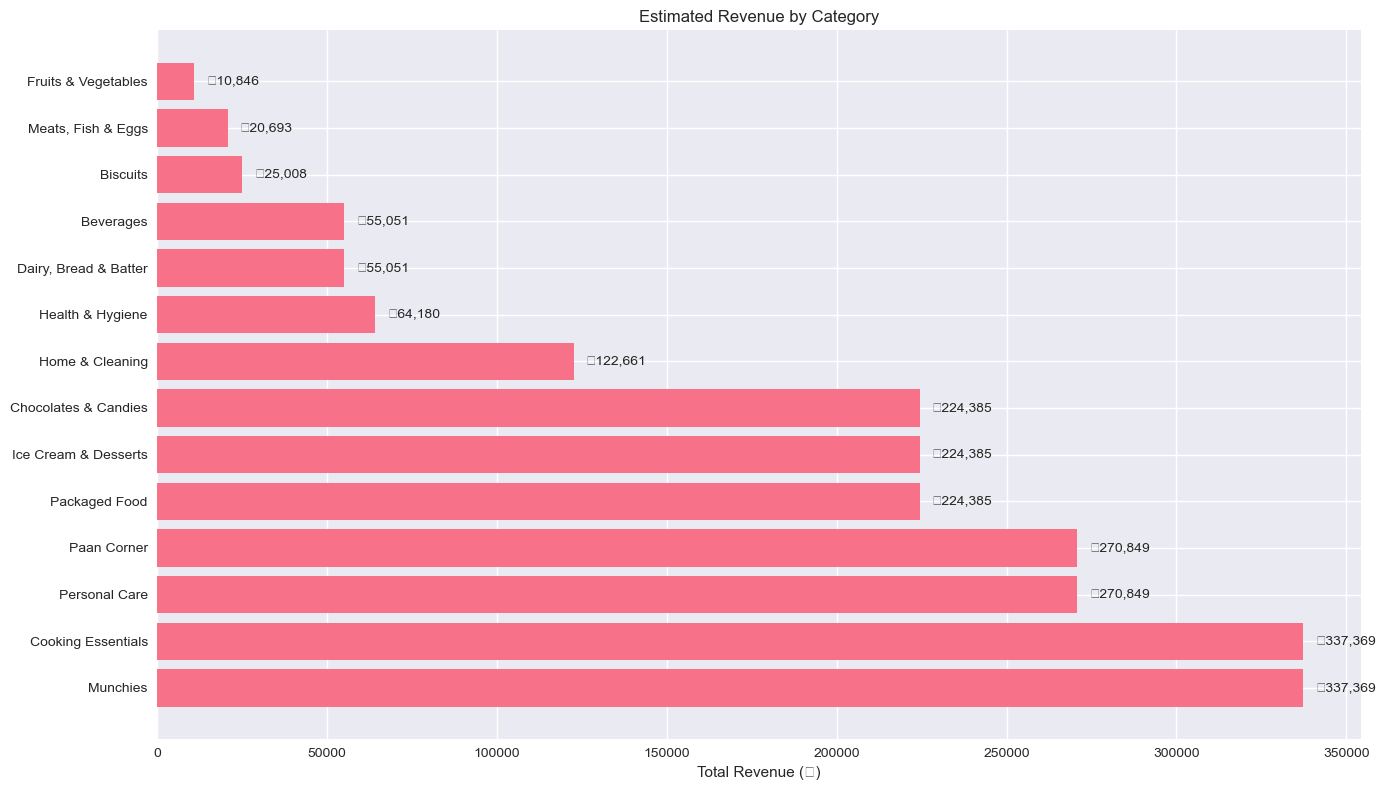


Total estimated revenue across all categories: ₹2,243,080.60


In [20]:
# Q3. Calculate Estimated Revenue for each category
revenue_by_category = df_cleaned.groupby('Category').apply(lambda x: (x['discountedSellingPrice'] * x['availableQuantity']).sum()).reset_index(name='total_revenue').sort_values('total_revenue', ascending=True)
print("Estimated Revenue by Category:")
print(revenue_by_category)

# Visualize revenue by category
plt.figure(figsize=(14, 8))
plt.barh(revenue_by_category['Category'], revenue_by_category['total_revenue'])
plt.xlabel('Total Revenue (₹)')
plt.title('Estimated Revenue by Category')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (category, revenue) in enumerate(zip(revenue_by_category['Category'], revenue_by_category['total_revenue'])):
    plt.text(revenue + max(revenue_by_category['total_revenue']) * 0.01, i, f'₹{revenue:,.0f}', va='center')

plt.tight_layout()
plt.show()

print(f"\nTotal estimated revenue across all categories: ₹{revenue_by_category['total_revenue'].sum():,.2f}")

### Q4. Products with MRP > 500 and discount < 10%

In [21]:
# Q4. Products with MRP > 500 and discount < 10%
premium_low_discount = df_cleaned[(df_cleaned['mrp'] > 500) & (df_cleaned['discountPercent'] < 10)].drop_duplicates(subset=['name'])[['name', 'mrp', 'discountPercent']].sort_values(['mrp', 'discountPercent'], ascending=[False, False])
print(f"Premium products (MRP > 500) with low discount (< 10%): {len(premium_low_discount)}")
print("\nTop 10 premium products with low discounts:")
print(premium_low_discount.head(10))

if len(premium_low_discount) > 0:
    print(f"\nAverage MRP of premium low-discount products: ₹{premium_low_discount['mrp'].mean():.2f}")
    print(f"Average discount of these products: {premium_low_discount['discountPercent'].mean():.2f}%")

Premium products (MRP > 500) with low discount (< 10%): 38

Top 10 premium products with low discounts:
                                                 name     mrp  discountPercent
121                 Dhara Kachi Ghani Mustard Oil Jar  1250.0                8
144                                Saffola Gold (Jar)  1240.0                0
146                Fortune Rice Bran Health Oil (Jar)  1050.0                1
224                Dhara Filtered Groundnut Oil (Jar)  1050.0                1
114                              Fortune Soyabean Oil  1005.0                0
104           Fortune Sunlite Refined Sunflower (Jar)   925.0                0
3545              Surf Excel Matic Powder Front Load    810.0                7
3556                        Surf Excel Matic Top Load   720.0                9
1669  Pedigree Puppy Dry Dog Food Food Chicken & Milk   690.0                6
1705              Pedigree Dog Food Adult Meat & Rice   660.0                7

Average MRP of premium low

### Q5. Top 5 categories with highest average discount percentage

Top 5 categories with highest average discount percentage:
               Category  avg_discount
0   Fruits & Vegetables         15.46
1    Meats, Fish & Eggs         11.03
2  Chocolates & Candies          8.32
3  Ice Cream & Desserts          8.32
4         Packaged Food          8.32


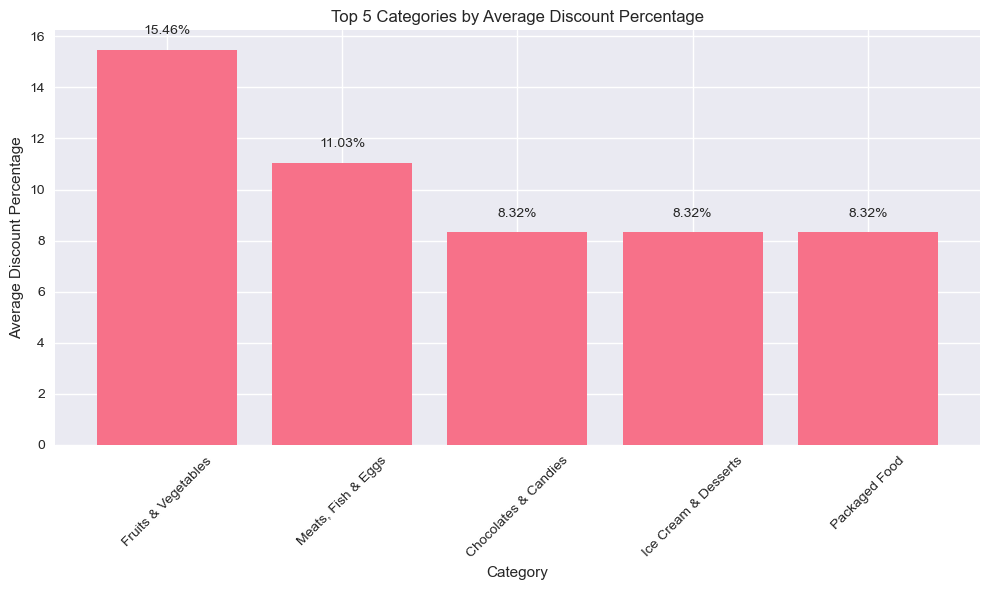

In [22]:
# Q5. Top 5 categories with highest average discount percentage
avg_discount_by_category = df_cleaned.groupby('Category')['discountPercent'].mean().round(2).sort_values(ascending=False).head(5).reset_index()
avg_discount_by_category.columns = ['Category', 'avg_discount']
print("Top 5 categories with highest average discount percentage:")
print(avg_discount_by_category)

# Visualize top categories by average discount
plt.figure(figsize=(10, 6))
plt.bar(avg_discount_by_category['Category'], avg_discount_by_category['avg_discount'])
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.title('Top 5 Categories by Average Discount Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on bars
for i, (category, discount) in enumerate(zip(avg_discount_by_category['Category'], avg_discount_by_category['avg_discount'])):
    plt.text(i, discount + 0.5, f'{discount}%', ha='center', va='bottom')

plt.show()

### Q6. Price per gram for products above 100g (best value)

Products above 100g: 2945

Top 10 best value products (lowest price per gram):
                                                   name  weightInGms  \
0                                                 Onion         1000   
3645                          Vicks Cough Drops Menthol         1160   
95                                            Tata Salt         1000   
550                            Aashirvaad Iodised Salt          1000   
3572  Shubh kart - Nirmal sugandhi mogra wet dhoop z...         1160   
5                                                Potato         1000   
3554      Shubh kart - Tejas Twisted Cotton Wicks 1000n         1000   
85                                               Carrot          500   
83                                             Beetroot          500   
53                                           Raw Banana          500   

      discountedSellingPrice  price_per_gram  
0                       21.0            0.02  
3645                    20.0      

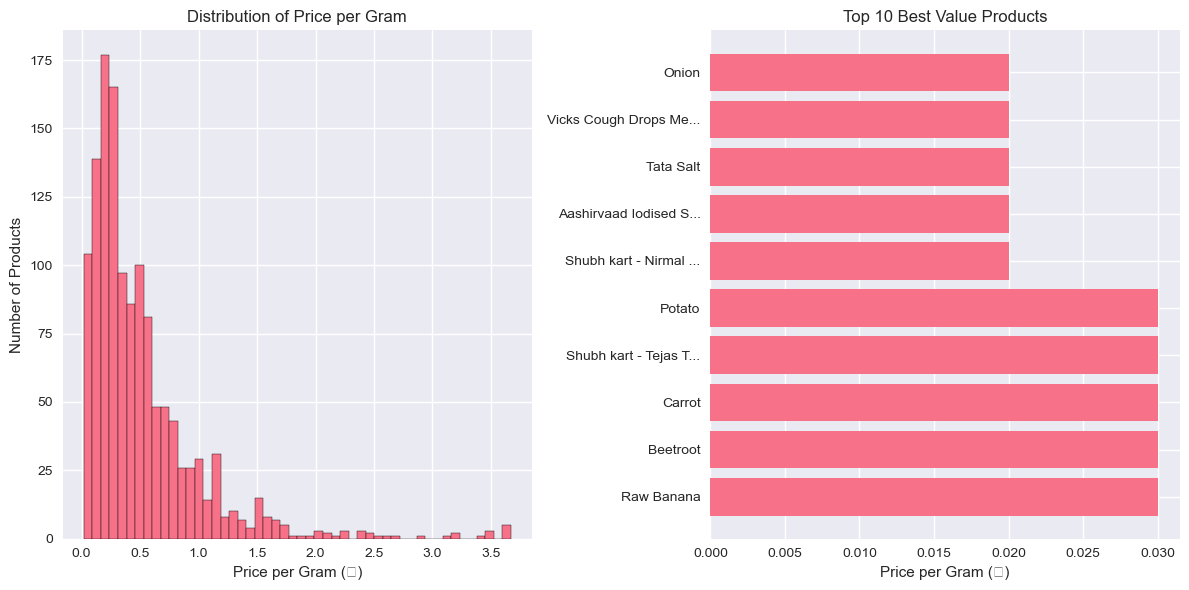

In [23]:
# Q6. Price per gram for products above 100g and sort by best value
heavy_products = df_cleaned[df_cleaned['weightInGms'] >= 100].copy()
heavy_products['price_per_gram'] = (heavy_products['discountedSellingPrice'] / heavy_products['weightInGms']).round(2)
best_value_products = heavy_products.drop_duplicates(subset=['name'])[['name', 'weightInGms', 'discountedSellingPrice', 'price_per_gram']].sort_values('price_per_gram')

print(f"Products above 100g: {len(heavy_products)}")
print("\nTop 10 best value products (lowest price per gram):")
print(best_value_products.head(10))

# Visualize price per gram distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(best_value_products['price_per_gram'], bins=50, edgecolor='black')
plt.xlabel('Price per Gram (₹)')
plt.ylabel('Number of Products')
plt.title('Distribution of Price per Gram')

plt.subplot(1, 2, 2)
top_10_value = best_value_products.head(10)
plt.barh(range(len(top_10_value)), top_10_value['price_per_gram'])
plt.yticks(range(len(top_10_value)), [name[:20] + '...' if len(name) > 20 else name for name in top_10_value['name']])
plt.xlabel('Price per Gram (₹)')
plt.title('Top 10 Best Value Products')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### Q7. Group products into weight categories (Low, Medium, Bulk)

Weight category distribution:
weight_category
LOW       3392
MEDIUM     293
BULK        46
Name: count, dtype: int64

Sample products by weight category:

LOW weight category examples:
  - Maybelline New York Colossal Kajal Super Black: 0g
  - Maybelline New York Colossal Kajal Black: 0g
  - Everest Saffron Kesar: 1g
  - Nivea Lip Balm Soft Rose for 24h Moisture with Nat: 5g
  - Nivea Lip Balm Original Care for 24h Moisture with: 5g

MEDIUM weight category examples:
  - Fortune Sunlite Refined Sunflower (Pouch): 1000g
  - Amul Taaza Toned Homogenised Milk: 1000g
  - Kapiva Wild Tulsi Giloy Juice |: 1000g
  - Surf Excel Easy Wash Detergent Powder: 1000g
  - Rin Detergent Powder: 1000g

BULK weight category examples:
  - 24 Mantra Sona Masuri Brown Rice: 5000g
  - Fortune Sunlite Refined Sunflower (Jar): 5000g
  - Aashirvaad Atta With Mutigrains: 5000g
  - Fortune Soyabean Oil: 5000g
  - Aashirvaad Superior MP Atta: 5000g


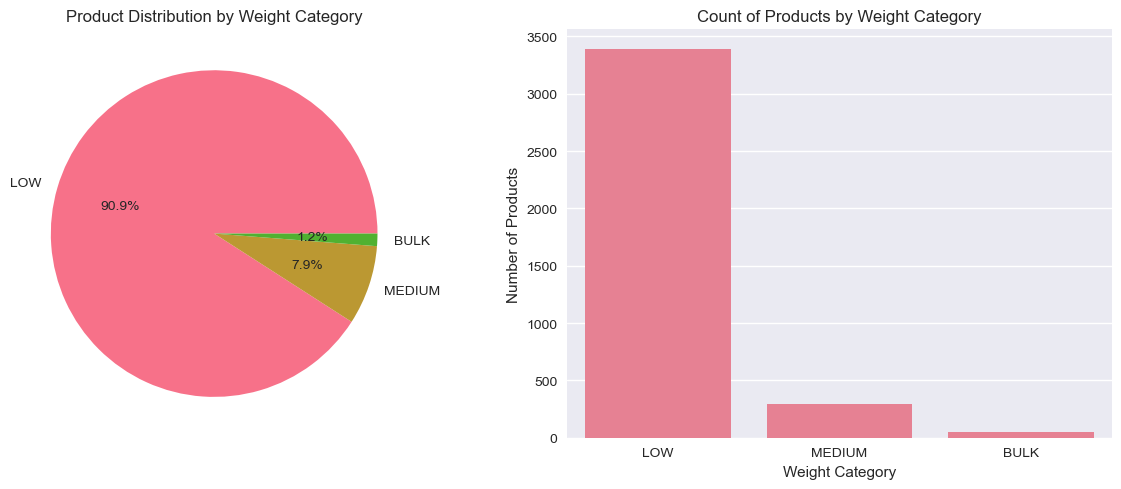

In [24]:
# Q7. Group products into weight categories (Low, Medium, Bulk)
def categorize_weight(weight):
    if weight < 1000:
        return 'LOW'
    elif weight < 5000:
        return 'MEDIUM'
    else:
        return 'BULK'

df_cleaned['weight_category'] = df_cleaned['weightInGms'].apply(categorize_weight)
weight_categories = df_cleaned.drop_duplicates(subset=['name'])[['name', 'weightInGms', 'weight_category']].sort_values('weightInGms')

print("Weight category distribution:")
print(df_cleaned['weight_category'].value_counts())

print("\nSample products by weight category:")
for category in ['LOW', 'MEDIUM', 'BULK']:
    print(f"\n{category} weight category examples:")
    examples = weight_categories[weight_categories['weight_category'] == category].head(5)
    for _, row in examples.iterrows():
        print(f"  - {row['name'][:50]}: {row['weightInGms']}g")

# Visualize weight categories
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
weight_cat_counts = df_cleaned['weight_category'].value_counts()
plt.pie(weight_cat_counts.values, labels=weight_cat_counts.index, autopct='%1.1f%%')
plt.title('Product Distribution by Weight Category')

plt.subplot(1, 2, 2)
sns.countplot(data=df_cleaned, x='weight_category', order=['LOW', 'MEDIUM', 'BULK'])
plt.title('Count of Products by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Number of Products')

plt.tight_layout()
plt.show()

### Q8. Total Inventory Weight Per Category

Total Inventory Weight by Category:
                 Category  total_weight_kg
9      Meats, Fish & Eggs            48.02
1                Biscuits            84.43
5     Fruits & Vegetables            91.79
6        Health & Hygiene           142.90
0               Beverages           143.74
4   Dairy, Bread & Batter           143.74
11            Paan Corner           348.19
13          Personal Care           348.19
7         Home & Cleaning           373.16
2    Chocolates & Candies           490.80
8    Ice Cream & Desserts           490.80
12          Packaged Food           490.80
3      Cooking Essentials          1404.65
10               Munchies          1404.65


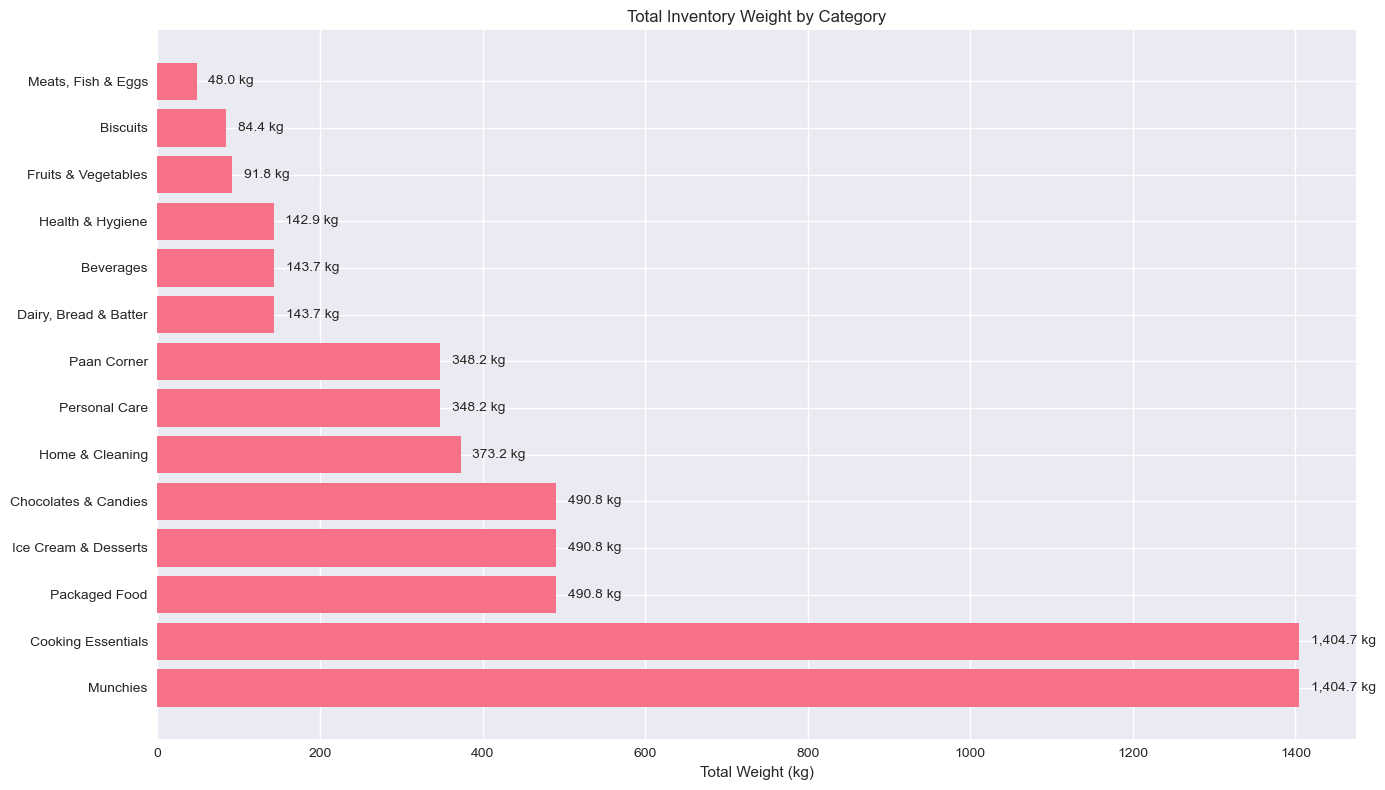


Total inventory weight across all categories: 6,005.86 kg


In [25]:
# Q8. Total Inventory Weight Per Category
total_weight_by_category = df_cleaned.groupby('Category').apply(lambda x: (x['weightInGms'] * x['availableQuantity']).sum()).reset_index(name='total_weight').sort_values('total_weight')
total_weight_by_category['total_weight_kg'] = (total_weight_by_category['total_weight'] / 1000).round(2)

print("Total Inventory Weight by Category:")
print(total_weight_by_category[['Category', 'total_weight_kg']])

# Visualize total inventory weight by category
plt.figure(figsize=(14, 8))
plt.barh(total_weight_by_category['Category'], total_weight_by_category['total_weight_kg'])
plt.xlabel('Total Weight (kg)')
plt.title('Total Inventory Weight by Category')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (category, weight) in enumerate(zip(total_weight_by_category['Category'], total_weight_by_category['total_weight_kg'])):
    plt.text(weight + max(total_weight_by_category['total_weight_kg']) * 0.01, i, f'{weight:,.1f} kg', va='center')

plt.tight_layout()
plt.show()

print(f"\nTotal inventory weight across all categories: {total_weight_by_category['total_weight_kg'].sum():,.2f} kg")

## 9. Summary and Key Insights

Let's summarize the key findings from our analysis:

In [27]:
# Summary Statistics and Key Insights
print("=== ZEPTO DATASET ANALYSIS SUMMARY ===\n")

print(f" Dataset Overview:")
print(f"   • Total products: {len(df_cleaned):,}")
print(f"   • Total categories: {df_cleaned['Category'].nunique()}")
print(f"   • Products in stock: {len(df_cleaned[df_cleaned['outOfStock'] == False]):,}")
print(f"   • Products out of stock: {len(df_cleaned[df_cleaned['outOfStock'] == True]):,}")

print(f"\n Revenue Insights:")
total_revenue = (df_cleaned['discountedSellingPrice'] * df_cleaned['availableQuantity']).sum()
print(f"   • Total estimated revenue: ₹{total_revenue:,.2f}")
avg_discount = df_cleaned['discountPercent'].mean()
print(f"   • Average discount percentage: {avg_discount:.2f}%")
avg_price = df_cleaned['discountedSellingPrice'].mean()
print(f"   • Average selling price: ₹{avg_price:.2f}")

print(f"\n Product Insights:")
print(f"   • Highest discount: {df_cleaned['discountPercent'].max():.1f}%")
print(f"   • Lowest discount: {df_cleaned['discountPercent'].min():.1f}%")
print(f"   • Most expensive product: ₹{df_cleaned['mrp'].max():,.2f}")
print(f"   • Cheapest product: ₹{df_cleaned['mrp'].min():,.2f}")

print(f"\n Inventory Insights:")
total_weight = (df_cleaned['weightInGms'] * df_cleaned['availableQuantity']).sum() / 1000
print(f"   • Total inventory weight: {total_weight:,.2f} kg")
avg_weight = df_cleaned['weightInGms'].mean()
print(f"   • Average product weight: {avg_weight:.1f} grams")

print(f"\n Business Recommendations:")
print("   • Focus on restocking high-MRP out-of-stock items")
print("   • Leverage high-discount categories for marketing")
print("   • Optimize inventory for heavy-weight, low-margin products")
print("   • Consider premium pricing strategy for low-discount, high-MRP items")

=== ZEPTO DATASET ANALYSIS SUMMARY ===

 Dataset Overview:
   • Total products: 3,731
   • Total categories: 14
   • Products in stock: 3,278
   • Products out of stock: 453

 Revenue Insights:
   • Total estimated revenue: ₹2,243,080.60
   • Average discount percentage: 7.62%
   • Average selling price: ₹141.97

 Product Insights:
   • Highest discount: 51.0%
   • Lowest discount: 0.0%
   • Most expensive product: ₹2,600.00
   • Cheapest product: ₹10.00

 Inventory Insights:
   • Total inventory weight: 6,005.85 kg
   • Average product weight: 387.9 grams

 Business Recommendations:
   • Focus on restocking high-MRP out-of-stock items
   • Leverage high-discount categories for marketing
   • Optimize inventory for heavy-weight, low-margin products
   • Consider premium pricing strategy for low-discount, high-MRP items
